### Pymaceuticals Data Analysis

* Mice treated with Capomulin had a 20% decrease in tumor volume while the three other treatment groups performed similarly with a roughly 50% increase in tumor volume.

* Of the four drugs analyzed the mice treated with Capomulin had the lowest rate of increase of metastatic sites, followed by Infubinol, then Ketapril, then Placebo.

* Mice treated with Capomulin had the best survival rate at the end of treatment (84%) while the three other treatment groups performed similarly with a survival rate around 40%. 

In [35]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy.stats import sem, linregress

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
clinical = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data = pd.merge(mouse, clinical, on = "Mouse ID")

# Display the data table for preview
data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vol = data.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
tumor_mean = tumor_vol.mean()
tumor_mean = tumor_mean.drop("Metastatic Sites", axis = 1)
tumor_mean = tumor_mean.reset_index()

# Preview DataFrame
tumor_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = tumor_vol.sem()

# Convert to DataFrame
tumor_sem = tumor_sem.drop(["Metastatic Sites", "Mouse ID"], axis = 1)
tumor_sem = tumor_sem.reset_index()

# Preview DataFrame
tumor_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean = tumor_mean.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
tumor_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


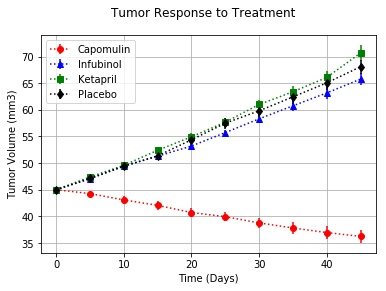

In [5]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

# Capomulin
ax.errorbar(np.arange(0, max(tumor_mean.index.values) + 1, 5),
            tumor_mean["Capomulin"],
            tumor_sem.loc[tumor_sem["Drug"] == "Capomulin", "Tumor Volume (mm3)"],
            color = 'r',
            fmt = "o",
            linestyle = ':')

# Infubinol
ax.errorbar(np.arange(0, max(tumor_mean.index.values) + 1, 5),
            tumor_mean["Infubinol"],
            tumor_sem.loc[tumor_sem["Drug"] == "Infubinol", "Tumor Volume (mm3)"],
            color = 'b',
            fmt = "^",
            linestyle = ':')

# Ketapril
ax.errorbar(np.arange(0, max(tumor_mean.index.values) + 1, 5),
            tumor_mean["Ketapril"],
            tumor_sem.loc[tumor_sem["Drug"] == "Ketapril", "Tumor Volume (mm3)"],
            color = 'g',
            fmt = "s",
            linestyle = ':')

# Placebo
ax.errorbar(np.arange(0, max(tumor_mean.index.values) + 1, 5),
            tumor_mean["Placebo"],
            tumor_sem.loc[tumor_sem["Drug"] == "Placebo", "Tumor Volume (mm3)"],
            color = 'black',
            fmt = "d",
            linestyle = ':')

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.legend(loc = "upper left")

fig.suptitle("Tumor Response to Treatment")
plt.grid(True)

# Save the Figure
plt.savefig('./Images/Tumor_Volume_Response.png')

In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_site = data.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
metastatic_mean = metastatic_site.mean()
metastatic_mean = metastatic_mean.drop("Tumor Volume (mm3)", axis = 1)
metastatic_mean = metastatic_mean.reset_index()

# Preview DataFrame
metastatic_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sem = metastatic_site.sem()
# Convert to DataFrame
metastatic_sem = metastatic_sem.drop(["Mouse ID", "Tumor Volume (mm3)"], axis = 1)
metastatic_sem = metastatic_sem.reset_index()

# Preview DataFrame
metastatic_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_mean = metastatic_mean.pivot(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")

# Preview that Reformatting worked
metastatic_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


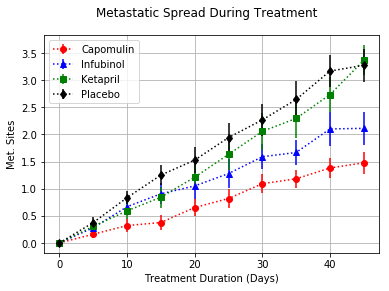

In [10]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

# Capomulin
ax.errorbar(np.arange(0, max(metastatic_mean.index.values) + 1, 5),
            metastatic_mean["Capomulin"],
            metastatic_sem.loc[metastatic_sem["Drug"] == "Capomulin", "Metastatic Sites"],
            color = 'r',
            fmt = "o",
            linestyle = ':')

# Infubinol
ax.errorbar(np.arange(0, max(metastatic_mean.index.values) + 1, 5),
            metastatic_mean["Infubinol"],
            metastatic_sem.loc[metastatic_sem["Drug"] == "Infubinol", "Metastatic Sites"],
            color = 'b',
            fmt = "^",
            linestyle = ':')

# Ketapril
ax.errorbar(np.arange(0, max(metastatic_mean.index.values) + 1, 5),
            metastatic_mean["Ketapril"],
            metastatic_sem.loc[metastatic_sem["Drug"] == "Ketapril", "Metastatic Sites"],
            color = 'g',
            fmt = "s",
            linestyle = ':')

# Placebo
ax.errorbar(np.arange(0, max(metastatic_mean.index.values) + 1, 5),
            metastatic_mean["Placebo"],
            metastatic_sem.loc[metastatic_sem["Drug"] == "Placebo", "Metastatic Sites"],
            color = 'black',
            fmt = "d",
            linestyle = ':')

ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.legend(loc = "upper left")

fig.suptitle("Metastatic Spread During Treatment")
plt.grid(True)

# Show the Figure
plt.savefig('./Images/Metastatic_Sites_Response.png')

In [11]:
# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_counts = data.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
mouse_counts = mouse_counts.count()
mouse_counts = mouse_counts.drop(["Tumor Volume (mm3)", "Metastatic Sites"], axis = 1)
mouse_counts = mouse_counts.rename(columns = {"Mouse ID": "Mouse Count"})
mouse_counts = mouse_counts.reset_index()

# Preview DataFrame
mouse_counts.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [22]:
# Before reseting index, this works
#mouse_counts.loc["Capomulin", 0][0] # gets me total mouse
#mouse_counts.loc["Capomulin", "Mouse Count"] / mouse_counts.loc["Capomulin", 0][0]
(mouse_counts["Capomulin"] / 25)*100

Timepoint
0     100.0
5     100.0
10    100.0
15     96.0
20     92.0
25     88.0
30     88.0
35     88.0
40     84.0
45     84.0
Name: Capomulin, dtype: float64

In [14]:
# Minor Data Munging to Re-Format the Data Frames
mouse_counts = mouse_counts.pivot(index = "Timepoint", columns = "Drug", values = "Mouse Count")

# Preview the Data Frame
mouse_counts.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


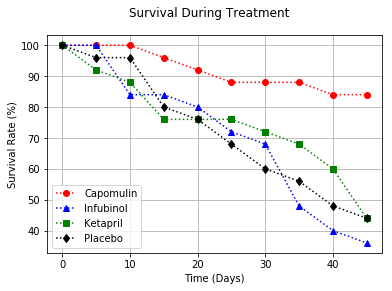

In [23]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()

# Capomulin
ax.plot(np.arange(0, max(metastatic_mean.index.values) + 1, 5),
        (mouse_counts["Capomulin"] / 25) * 100,
        color = 'r',
        marker = 'o',
        linestyle = ":",
        label = "Capomulin")

# Infubinol
ax.plot(np.arange(0, max(metastatic_mean.index.values) + 1, 5),
        (mouse_counts["Infubinol"] / 25) * 100,
        color = 'b',
        marker = '^',
        linestyle = ":",
        label = "Infubinol")

# Ketapril
ax.plot(np.arange(0, max(metastatic_mean.index.values) + 1, 5),
        (mouse_counts["Ketapril"] / 25) * 100,
        color = 'g',
        marker = 's',
        linestyle = ":",
        label = "Ketapril")

# Placebo
ax.plot(np.arange(0, max(metastatic_mean.index.values) + 1, 5),
        (mouse_counts["Placebo"] / 25) * 100,
        color = 'black',
        marker = 'd',
        linestyle = ":",
        label = "Placebo")

# Transform data and adjust y axis 

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.legend(loc = "lower left")

fig.suptitle("Survival During Treatment")
plt.grid(True)

# Show the Figure
plt.savefig('./Images/Survival_Rate.png')

In [16]:
# Show the Figure
plt.show()

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
perc_change = [((tumor_mean.loc[45, i] - tumor_mean.loc[0, i]) / tumor_mean.loc[0, i]) * 100 for i in list(tumor_mean)]
perc_change = pd.DataFrame(perc_change, list(tumor_mean), columns = ["Percent Change"])

# Display the data to confirm
perc_change

,Percent Change
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134
Zoniferol,46.579751


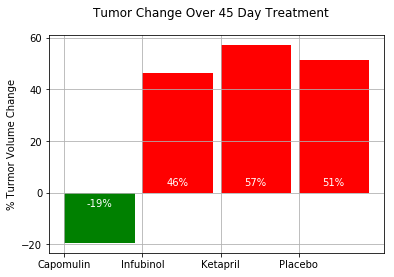

In [53]:
# Store all Relevant Percent Changes into a Tuple
change_data = (perc_change.loc["Capomulin"][0],
               perc_change.loc["Infubinol"][0],
               perc_change.loc["Ketapril"][0],
               perc_change.loc["Placebo"][0])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
bar = ax.bar(np.arange(len(change_data)),
             change_data,
             align = "edge",
             #align = "center",
             width = .9,
             color = ["green", "red", "red", "red"])

# Orient widths. Add labels, tick marks, etc. 
ax.set_xticks(np.arange(len(change_data)))
ax.set_xticklabels(["Capomulin", "Infubinol", "Ketapril", "Placebo"])

ax.set_yticks(np.arange(math.floor(min(change_data)),
                        math.floor(max(change_data)) + 20,
                        20))
ax.set_ylabel("% Turmor Volume Change")
fig.suptitle("Tumor Change Over 45 Day Treatment")
plt.grid(True, which = "major")

def autolabel(rects):

    for rect in rects:
        height = rect.get_height()
        if(height > 0):
            label_height = 2
        else:
            label_height = -6
        ax.text(rect.get_x() + rect.get_width()/2., label_height,
                f"{'%d' % int(height)}%",
                ha = 'center', va = 'bottom', color = 'white')
autolabel(bar)

# Save the Figure
plt.savefig('./Images/Tumor_Volume_Change.png')

array([-19.47530267,   0.52469733,  20.52469733,  40.52469733,
        60.52469733])

In [19]:
# Show the Figure
fig.show()